## Outliers Treatment
We explore different techniques to detect and handle outliers in a dataset. We start with few simplistic examples

### Single variable, no target
Dataset contains many one-variable data points (i.e. it can be expressed by a design matrix of dimension $N\times 1$). To simplify the problem, the dataset is generated by a **normoal** (Gaussian) process. If there are enough data, an outlier can be identified by comparing the position of datapoint to the central point and the metric of comparison would be some function of **variance** of the distibution.

Let assume the dataset is generated by 
$$ p(x) = \exp{\left(-\frac{(x - x_0)^2}{\sigma^2}\right)}$$
we can identify an outlier simply by satisfying condition $|x_o - x_0| > \alpha \sigma$, where $\alpha$ is choosen to *maximize the robustness*.

### Multiple independent variables, no target
Any technique that has been developed in the previous case is applicable here, we just treat every variable indepepdently.

### Multiple covariant variables, no target


### Generalize the previous cases with target
In theory, the target can be seen as an extra column in the design matrix with high correlation with other columns. In such picture, conditional interpretation of the dependency would be very helpful. 

## Ideas
- [ ] Apply clustering with large number of clusters, remove the minority classes to achieve the best generalization error.
- [ ] PCA with target in picture (what is called?) Study [this](https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html):  *Principal Component Regression* **(PCR)** vs. *Partial Least Squares Regression* **(PLS)**

- [ ] Anomaly (i.e. outlier) generator for given dataset.
- [ ] The approach to outlier detection must address the problem of *curse of dimensionality*

In [1]:
import numpy as np
from numpy.random import multivariate_normal as mln
import numpy.random as rnd
import matplotlib.pyplot as pl
import pandas as pd
from sklearn.linear_model import LinearRegression

## Single variable

In [2]:
mean = 0
std = 0.4
size = 1000
X = rnd.normal(mean, std, size=size)

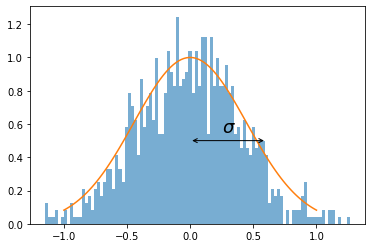

In [3]:
_ = pl.hist(X, bins=100, density=True, alpha=0.6)
x = np.linspace(-1,1, 100)
y = np.exp(-x**2/std)
pl.plot(x,y)
pl.annotate(text='',  xy=(0,0.5), xytext=(0.6,0.5), arrowprops=dict(arrowstyle='<->'))
_ = pl.text(0.25, .55, '$\sigma$', fontsize=18)


In [4]:
x_mean = np.array([0,0])
x_cov = np.array([[1,0.9],
                    [0.9,1]])

In [5]:
X = mln(x_mean, x_cov, size=1000)

In [6]:
X.shape

(1000, 2)

In [7]:
def normal_contour(x1,x2, x_cov):
    """ Multivariate Normal function for given X and covariance matrix"""
    x = np.array([x1,x2], dtype=float)
    return np.exp(-(x1*x_cov[0,0]*x1 + x1*x_cov[0,1]*x2 + x2*x_cov[1,0]*x1 + x2*x_cov[1,1]*x2))

### Visualize a bivariate normal distribution

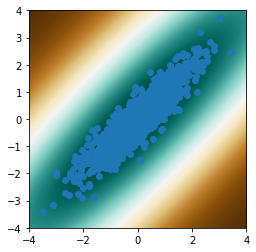

In [8]:
x1 = np.linspace(-1,1,100)
x2 = np.linspace(-1,1,100)
xx1, xx2 = np.meshgrid(x1, x2)
x_cov = np.array([[1,.9],
                 [0.9,1]])
z = normal_contour(xx1, xx2, x_cov)
pl.imshow(z,  cmap=pl.cm.BrBG, extent=[-4,4,-4,4])
pl.scatter(X[:,0], X[:,1])

### Principal Component Analysis

With `PCA` one can find the directions in the feature space that the variation is largest. However in this basic approach the variation of variables respect to the target is disregarded. 

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()

In [11]:
pca.fit(X)

PCA()

In [12]:
x_transformed = pca.transform(X)

In [13]:
x_transformed.shape, X.shape

((1000, 2), (1000, 2))

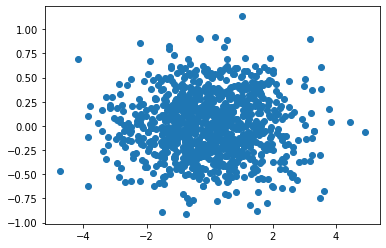

In [14]:
pl.scatter(x_transformed[:,0], x_transformed[:,1])

In [15]:
pca.explained_variance_

array([1.96334186, 0.10349457])